In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!pip install nltk

In [43]:
!pip install wordcloud

In [44]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [45]:
# Unduh data NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
# load file
df = pd.read_csv('/content/drive/MyDrive/Portfolio/Sentiment Analysis User Reviews App GetContact/CleanedGetContact.csv')

In [47]:
# Case folding pada kolom teks (seluruh data)
df['content_casefolding'] = df['content'].str.lower()
df

,content,content_casefolding
0,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...
1,Some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...
2,Kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy
3,baik,baik
4,Dulu gratis skrg berbayar.. Uninstall aja lah,dulu gratis skrg berbayar.. uninstall aja lah
...,...,...
4378,Aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...
4379,"Awal nya sih bagus aja,tapi lama maksa premium...","awal nya sih bagus aja,tapi lama maksa premium..."
4380,Saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...
4381,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu


In [48]:
# Menghapus tanda baca dari kolom teks
df['content_remove_punct'] = df['content_casefolding'].str.translate(str.maketrans('', '', string.punctuation))
df
#print("Contoh data setelah remove punctuation :")
#df['Tweet'].loc[0]

,content,content_casefolding,content_remove_punct
0,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...
1,Some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...
2,Kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy
3,baik,baik,baik
4,Dulu gratis skrg berbayar.. Uninstall aja lah,dulu gratis skrg berbayar.. uninstall aja lah,dulu gratis skrg berbayar uninstall aja lah
...,...,...,...
4378,Aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...
4379,"Awal nya sih bagus aja,tapi lama maksa premium...","awal nya sih bagus aja,tapi lama maksa premium...",awal nya sih bagus ajatapi lama maksa premium ...
4380,Saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...
4381,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu


In [49]:
# Tokenisasi menggunakan split standar
df['content_tokens'] = df['content_remove_punct'].apply(lambda x: x.split() if isinstance(x, str) else [])
df

,content,content_casefolding,content_remove_punct,content_tokens
0,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,"[nomor, saya, gbsa, verifikasi, udh, puluhan, ..."
1,Some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,"[some, number, can, refuse, to, be, seen, on, ..."
2,Kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,"[kembalikan, getcontact, seperti, dulu, woyy]"
3,baik,baik,baik,[baik]
4,Dulu gratis skrg berbayar.. Uninstall aja lah,dulu gratis skrg berbayar.. uninstall aja lah,dulu gratis skrg berbayar uninstall aja lah,"[dulu, gratis, skrg, berbayar, uninstall, aja,..."
...,...,...,...,...
4378,Aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,"[aku, udah, mencoba, masuk, beberapa, kali, le..."
4379,"Awal nya sih bagus aja,tapi lama maksa premium...","awal nya sih bagus aja,tapi lama maksa premium...",awal nya sih bagus ajatapi lama maksa premium ...,"[awal, nya, sih, bagus, ajatapi, lama, maksa, ..."
4380,Saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,"[saya, kasih, bintang, aja, kalau, tau, hasiln..."
4381,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,"[pelit, lu, ngeliat, tag, orang, aja, harus, p..."


In [50]:
!pip install Sastrawi

In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [52]:
# Melakukan stemming pada kolom tokens
df['content_stemming'] = df['content_tokens'].apply(lambda words: [stemmer.stem(word) for word in words])
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming
0,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,"[nomor, saya, gbsa, verifikasi, udh, puluhan, ...","[nomor, saya, gbsa, verifikasi, udh, puluh, ka..."
1,Some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,"[some, number, can, refuse, to, be, seen, on, ...","[some, number, can, refuse, to, be, seen, on, ..."
2,Kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,"[kembalikan, getcontact, seperti, dulu, woyy]","[kembali, getcontact, seperti, dulu, woyy]"
3,baik,baik,baik,[baik],[baik]
4,Dulu gratis skrg berbayar.. Uninstall aja lah,dulu gratis skrg berbayar.. uninstall aja lah,dulu gratis skrg berbayar uninstall aja lah,"[dulu, gratis, skrg, berbayar, uninstall, aja,...","[dulu, gratis, skrg, bayar, uninstall, aja, lah]"
...,...,...,...,...,...
4378,Aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,"[aku, udah, mencoba, masuk, beberapa, kali, le...","[aku, udah, coba, masuk, beberapa, kali, lebih..."
4379,"Awal nya sih bagus aja,tapi lama maksa premium...","awal nya sih bagus aja,tapi lama maksa premium...",awal nya sih bagus ajatapi lama maksa premium ...,"[awal, nya, sih, bagus, ajatapi, lama, maksa, ...","[awal, nya, sih, bagus, ajatapi, lama, maksa, ..."
4380,Saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,"[saya, kasih, bintang, aja, kalau, tau, hasiln...","[saya, kasih, bintang, aja, kalau, tau, hasil,..."
4381,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,"[pelit, lu, ngeliat, tag, orang, aja, harus, p...","[pelit, lu, ngeliat, tag, orang, aja, harus, p..."


In [53]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi'] = df['content_stemming'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi
0,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,"[nomor, saya, gbsa, verifikasi, udh, puluhan, ...","[nomor, saya, gbsa, verifikasi, udh, puluh, ka...",nomor saya gbsa verifikasi udh puluh kali coba
1,Some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,"[some, number, can, refuse, to, be, seen, on, ...","[some, number, can, refuse, to, be, seen, on, ...",some number can refuse to be seen on their tag...
2,Kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,"[kembalikan, getcontact, seperti, dulu, woyy]","[kembali, getcontact, seperti, dulu, woyy]",kembali getcontact seperti dulu woyy
3,baik,baik,baik,[baik],[baik],baik
4,Dulu gratis skrg berbayar.. Uninstall aja lah,dulu gratis skrg berbayar.. uninstall aja lah,dulu gratis skrg berbayar uninstall aja lah,"[dulu, gratis, skrg, berbayar, uninstall, aja,...","[dulu, gratis, skrg, bayar, uninstall, aja, lah]",dulu gratis skrg bayar uninstall aja lah
...,...,...,...,...,...,...
4378,Aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,"[aku, udah, mencoba, masuk, beberapa, kali, le...","[aku, udah, coba, masuk, beberapa, kali, lebih...",aku udah coba masuk beberapa kali lebih lengka...
4379,"Awal nya sih bagus aja,tapi lama maksa premium...","awal nya sih bagus aja,tapi lama maksa premium...",awal nya sih bagus ajatapi lama maksa premium ...,"[awal, nya, sih, bagus, ajatapi, lama, maksa, ...","[awal, nya, sih, bagus, ajatapi, lama, maksa, ...",awal nya sih bagus ajatapi lama maksa premium ...
4380,Saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,"[saya, kasih, bintang, aja, kalau, tau, hasiln...","[saya, kasih, bintang, aja, kalau, tau, hasil,...",saya kasih bintang aja kalau tau hasil baru aq...
4381,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,"[pelit, lu, ngeliat, tag, orang, aja, harus, p...","[pelit, lu, ngeliat, tag, orang, aja, harus, p...",pelit lu ngeliat tag orang aja harus premium dulu


In [56]:
data = pd.read_csv('/content/drive/MyDrive/Portfolio/Sentiment Analysis User Reviews App GetContact/CleanedGetContact.csv')
text_column = df['content_normalisasi'].dropna().str.cat(sep=' ')

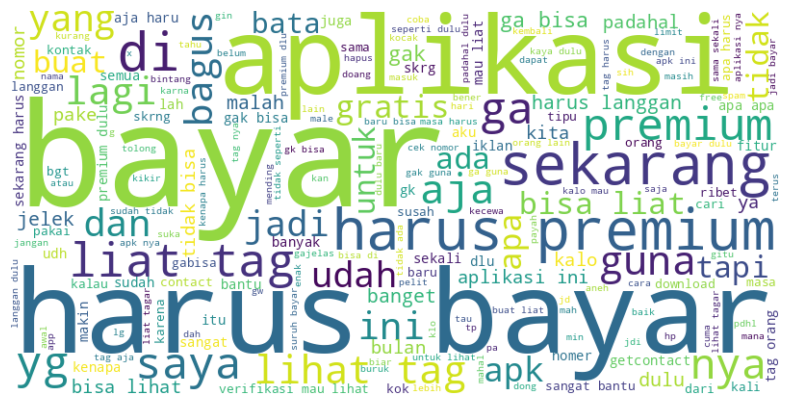

In [57]:
#wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_column)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
# Mendapatkan frekuensi kata dari word cloud
word_freq = wordcloud.words_

# Mengurutkan frekuensi kata secara menurun
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Membuat array dari kata-kata yang sering muncul
top_words = [word for word, freq in sorted_word_freq]

# Menampilkan array kata-kata yang sering muncul
print(top_words)

['bayar', 'harus bayar', 'aplikasi', 'harus premium', 'sekarang', 'di', 'liat tag', 'premium', 'ga', 'saya', 'yg', 'nya', 'aja', 'guna', 'lihat tag', 'lagi', 'bagus', 'dan', 'ini', 'yang', 'jadi', 'udah', 'apk', 'gratis', 'apa', 'bisa liat', 'tidak', 'buat', 'ada', 'tapi', 'untuk', 'bata', 'ga bisa', 'gak', 'harus langgan', 'dulu', 'banget', 'jelek', 'malah', 'aplikasi ini', 'ya', 'bulan', 'nomor', 'bisa lihat', 'pake', 'tidak bisa', 'kalo', 'kita', 'padahal', 'getcontact', 'sudah', 'iklan', 'mau liat', 'sekarang harus', 'gak bisa', 'nomer', 'lah', 'makin', 'juga', 'itu', 'semua', 'skrg', 'banyak', 'fitur', 'kenapa', 'apa apa', 'udh', 'tag orang', 'aku', 'premium dulu', 'bantu', 'dlu', 'aja haru', 'sekali', 'sangat', 'gk', 'sangat bantu', 'tipu', 'contact', 'kali', 'kok', 'bgt', 'pakai', 'orang', 'baru', 'download', 'skrng', 'apa harus', 'kalau', 'cari', 'masa', 'dari', 'sama', 'kontak', 'verifikasi', 'ribet', 'gabisa', 'karena', 'mau lihat', 'langgan', 'susah', 'seperti dulu', 'sih', 

In [60]:
# Daftar kata stopword tambahan
additional_stopwords = ['getcontact']
# Ambil daftar stopwords bahasa Indonesia dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Tambahkan kata-kata stopword tambahan ke dalam set stop_words
stop_words.update(additional_stopwords)

# Lakukan stopword removal pada kolom 'Tweet_tokens' dan simpan hasilnya pada kolom 'Tweet_stopword'
df['content_stopword'] = df['content_tokens'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

# Tampilkan DataFrame yang sudah diperbarui
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword
0,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,"[nomor, saya, gbsa, verifikasi, udh, puluhan, ...","[nomor, saya, gbsa, verifikasi, udh, puluh, ka...",nomor saya gbsa verifikasi udh puluh kali coba,"[nomor, gbsa, verifikasi, udh, puluhan, kali, ..."
1,Some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,"[some, number, can, refuse, to, be, seen, on, ...","[some, number, can, refuse, to, be, seen, on, ...",some number can refuse to be seen on their tag...,"[some, number, can, refuse, to, be, seen, on, ..."
2,Kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,"[kembalikan, getcontact, seperti, dulu, woyy]","[kembali, getcontact, seperti, dulu, woyy]",kembali getcontact seperti dulu woyy,"[kembalikan, woyy]"
3,baik,baik,baik,[baik],[baik],baik,[]
4,Dulu gratis skrg berbayar.. Uninstall aja lah,dulu gratis skrg berbayar.. uninstall aja lah,dulu gratis skrg berbayar uninstall aja lah,"[dulu, gratis, skrg, berbayar, uninstall, aja,...","[dulu, gratis, skrg, bayar, uninstall, aja, lah]",dulu gratis skrg bayar uninstall aja lah,"[gratis, skrg, berbayar, uninstall, aja]"
...,...,...,...,...,...,...,...
4378,Aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,"[aku, udah, mencoba, masuk, beberapa, kali, le...","[aku, udah, coba, masuk, beberapa, kali, lebih...",aku udah coba masuk beberapa kali lebih lengka...,"[udah, mencoba, masuk, kali, lengkap, dgn, isi..."
4379,"Awal nya sih bagus aja,tapi lama maksa premium...","awal nya sih bagus aja,tapi lama maksa premium...",awal nya sih bagus ajatapi lama maksa premium ...,"[awal, nya, sih, bagus, ajatapi, lama, maksa, ...","[awal, nya, sih, bagus, ajatapi, lama, maksa, ...",awal nya sih bagus ajatapi lama maksa premium ...,"[nya, sih, bagus, ajatapi, maksa, premium, k, ..."
4380,Saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,"[saya, kasih, bintang, aja, kalau, tau, hasiln...","[saya, kasih, bintang, aja, kalau, tau, hasil,...",saya kasih bintang aja kalau tau hasil baru aq...,"[kasih, bintang, aja, tau, hasilnya, aqu]"
4381,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,"[pelit, lu, ngeliat, tag, orang, aja, harus, p...","[pelit, lu, ngeliat, tag, orang, aja, harus, p...",pelit lu ngeliat tag orang aja harus premium dulu,"[pelit, lu, ngeliat, tag, orang, aja, premium]"


In [61]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi2'] = df['content_stopword'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword,content_normalisasi2
0,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,nomor saya gbsa verifikasi udh puluhan kali di...,"[nomor, saya, gbsa, verifikasi, udh, puluhan, ...","[nomor, saya, gbsa, verifikasi, udh, puluh, ka...",nomor saya gbsa verifikasi udh puluh kali coba,"[nomor, gbsa, verifikasi, udh, puluhan, kali, ...",nomor gbsa verifikasi udh puluhan kali dicoba
1,Some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,some number can refuse to be seen on their tag...,"[some, number, can, refuse, to, be, seen, on, ...","[some, number, can, refuse, to, be, seen, on, ...",some number can refuse to be seen on their tag...,"[some, number, can, refuse, to, be, seen, on, ...",some number can refuse to be seen on their tag...
2,Kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,kembalikan getcontact seperti dulu woyy,"[kembalikan, getcontact, seperti, dulu, woyy]","[kembali, getcontact, seperti, dulu, woyy]",kembali getcontact seperti dulu woyy,"[kembalikan, woyy]",kembalikan woyy
3,baik,baik,baik,[baik],[baik],baik,[],
4,Dulu gratis skrg berbayar.. Uninstall aja lah,dulu gratis skrg berbayar.. uninstall aja lah,dulu gratis skrg berbayar uninstall aja lah,"[dulu, gratis, skrg, berbayar, uninstall, aja,...","[dulu, gratis, skrg, bayar, uninstall, aja, lah]",dulu gratis skrg bayar uninstall aja lah,"[gratis, skrg, berbayar, uninstall, aja]",gratis skrg berbayar uninstall aja
...,...,...,...,...,...,...,...,...
4378,Aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,aku udah mencoba masuk beberapa kali lebih len...,"[aku, udah, mencoba, masuk, beberapa, kali, le...","[aku, udah, coba, masuk, beberapa, kali, lebih...",aku udah coba masuk beberapa kali lebih lengka...,"[udah, mencoba, masuk, kali, lengkap, dgn, isi...",udah mencoba masuk kali lengkap dgn isi formul...
4379,"Awal nya sih bagus aja,tapi lama maksa premium...","awal nya sih bagus aja,tapi lama maksa premium...",awal nya sih bagus ajatapi lama maksa premium ...,"[awal, nya, sih, bagus, ajatapi, lama, maksa, ...","[awal, nya, sih, bagus, ajatapi, lama, maksa, ...",awal nya sih bagus ajatapi lama maksa premium ...,"[nya, sih, bagus, ajatapi, maksa, premium, k, ...",nya sih bagus ajatapi maksa premium k gak pemi...
4380,Saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,saya kasih bintang aja kalau tau hasilnya baru...,"[saya, kasih, bintang, aja, kalau, tau, hasiln...","[saya, kasih, bintang, aja, kalau, tau, hasil,...",saya kasih bintang aja kalau tau hasil baru aq...,"[kasih, bintang, aja, tau, hasilnya, aqu]",kasih bintang aja tau hasilnya aqu
4381,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,pelit lu ngeliat tag orang aja harus premium dulu,"[pelit, lu, ngeliat, tag, orang, aja, harus, p...","[pelit, lu, ngeliat, tag, orang, aja, harus, p...",pelit lu ngeliat tag orang aja harus premium dulu,"[pelit, lu, ngeliat, tag, orang, aja, premium]",pelit lu ngeliat tag orang aja premium


In [62]:
df.drop(df.columns[[0,1,2,3,4,5,6]], axis = 1, inplace = True)
df.head()

,content_normalisasi2
0,nomor gbsa verifikasi udh puluhan kali dicoba
1,some number can refuse to be seen on their tag...
2,kembalikan woyy
3,
4,gratis skrg berbayar uninstall aja


In [63]:
# Menyimpan data yang telah dibersihkan
df.to_csv('/content/drive/MyDrive/Portfolio/Sentiment Analysis User Reviews App GetContact/ProssedGetContact.csv', index=False)